In [1]:
!pip install fastai wwf nbdev streamlit -q --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 109.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.3 MB/s eta 0:00:00

In [2]:
import pandas as pd
# import streamlit as st
#from tensorflow.keras import layers
# import tensorflow as tf
# import numpy, tensorflow and matplotlib
# import tensorflow as tf
# import numpy as np
# import matplotlib.pyplot as plt
 
# # import VGG 19 model and keras Model API
# from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.python.keras.models import Model

# import numpy as np
import scipy as sp
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False
import numpy as np
import PIL.Image
import time
import functools
import os
import glob
# from fastai.vision import *
from torchvision.models import vgg19, vgg16
from nbdev.showdoc import *
from fastai.vision.all import *
import torchvision.transforms as transforms
from fastai.vision.core import *
from fastai.imports import *
from PIL import Image
import torch

%matplotlib inline
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:516"

art = 'Alfred_Sisley'
number = 9


# print(tf.__version__)

In [3]:
# # learn = load_learner('/content/drive/MyDrive/Colab_Notebooks/TrainedModels/uncorrupted.pkl', cpu=False) #WORKING DONT TOUCH
# learn = load_learner('/content/drive/MyDrive/Colab_Notebooks/TrainedModels/withcpuandshouldwork.pkl', cpu=True) #WORKING DONT TOUCH
# dset = Datasets(f'/content/drive/MyDrive/Colab_Notebooks/BestArtworksAndArtists/resized/{art}_{number}.jpg', tfms=[PILImage.create]) # WORKING DON'T TOUCH
# dl = dset.dataloaders(after_item=[ToTensor()], after_batch=[IntToFloatTensor(), Normalize.from_stats(*imagenet_stats)], bs=1) # WORKING DON'T TOUCH
# t_im = dl.one_batch()[0] # WORKING DON'T TOUCH
# with torch.no_grad(): # WORKING DON'T TOUCH
#   res = learn.model(t_im) # WORKING DON'T TOUCH
# # # Convert the tensor to a numpy array # WORKING DON'T TOUCH
# img_np = res.squeeze().permute(1, 2, 0).cpu().numpy() # WORKING DON'T TOUCH

# # # Scale the values to [0, 1] range # WORKING DON'T TOUCH
# img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min()) # WORKING DON'T TOUCH

# # # Convert the numpy array to a PIL Image object # WORKING DON'T TOUCH
# img_pil = Image.fromarray((img_np * 255).astype('uint8')) # WORKING DON'T TOUCH

# # # Display the image # WORKING DON'T TOUCH
# img_pil.show() # WORKING DON'T TOUCH

In [4]:
# st.write(
#     """
#     #My app
#     Hello *World!*
#     """
# )

In [5]:
!nvidia-smi

Mon May 29 21:42:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    46W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
feat_net = vgg19(pretrained=True).features.cuda().eval()
for p in feat_net.parameters(): p.requries_grad=False

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:01<00:00, 392MB/s]


In [7]:
layers = [feat_net[i] for i in [1, 6, 11, 20, 29, 22]]; layers

[ReLU(inplace=True),
 ReLU(inplace=True),
 ReLU(inplace=True),
 ReLU(inplace=True),
 ReLU(inplace=True),
 ReLU(inplace=True)]

In [8]:
_vgg_config = {
    'vgg16' : [1, 11, 18, 25, 20],
    'vgg19' : [1, 6, 11, 20, 29, 22]
}

In [9]:
def _get_layers(arch:str, pretrained=True):
  "Get the layers and arch for a VGG Model (16 and 19 are supported only)"
  feat_net = vgg19(pretrained=pretrained).cuda() if arch.find('9') > 1 else vgg16(pretrained=pretrained).cuda()
  config = _vgg_config.get(arch)
  features = feat_net.features.cuda().eval()
  for p in features.parameters(): p.requires_grad=False
  return feat_net, [features[i] for i in config]

In [10]:
# def get_feats(arch:str, pretrained=True):
#   "Get the features of an architecture"
#   feat_net, layers = _get_layers(arch, pretrained)
#   hooks = hook_outputs(layers, detach=False)
#   def _inner(x):
#     feat_net(x)
#     return hooks.stored
#   return _inner

In [11]:
def _inner(hooks, feat_net, x):
    feat_net(x)
    return hooks.stored

def get_feats(arch:str, pretrained=True):
    "Get the features of an architecture"
    feat_net, layers = _get_layers(arch, pretrained)
    hooks = hook_outputs(layers, detach=False)
    return partial(_inner, hooks, feat_net)

In [12]:
feats = get_feats('vgg19')

In [13]:
# image_file = st.file_uploader("Upload An Image",type=['png','jpeg','jpg'])
# if image_file is not None:
#     file_path = f'/content/drive/MyDrive/Colab_Notebooks/tmp.{image_file.type}'
#     file_details = {"FileName":image_file.name,"FileType":image_file.type}
#     st.write(file_details)
#     img = load_image(image_file)
#     st.image(img,height=250,width=250)
#     # with open(os.path.join("tempDir",image_file.name),"wb") as f: 
#     with open(file_path,"wb") as f: 
#       f.write(image_file.getbuffer())         
#     st.success("Saved File")

In [14]:
fn = f'/content/drive/MyDrive/Colab_Notebooks/BestArtworksAndArtists/resized/{art}_{number}.jpg'
dset = Datasets(fn, tfms=[PILImage.create])

In [15]:
# dset = Datasets(file_path, tfms=[PILImage.create])

In [16]:
dl = dset.dataloaders(after_item=[ToTensor()], after_batch=[IntToFloatTensor(), Normalize.from_stats(*imagenet_stats)], bs=1)

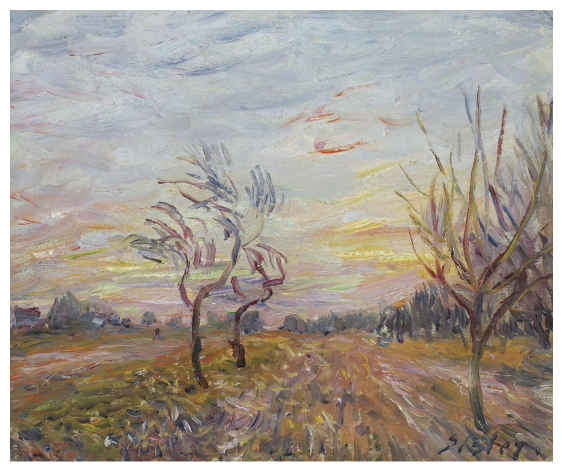

In [17]:
dl.show_batch(figsize=(7,7))

In [18]:
style_im = dl.one_batch()[0]
style_im.shape

torch.Size([1, 3, 999, 1199])

In [19]:
####Working version, don't touch
# Get the names of each of the artists
files = glob.glob('/content/drive/MyDrive/Colab_Notebooks/BestArtworksAndArtists/images/*', recursive=False)
files_paths = [_ for _ in files]
artists = []
for file in files_paths:
    artists.append(os.path.basename(os.path.normpath(file)))
# artists

In [20]:
# Get the names of each of the artists
files = glob.glob('/content/drive/MyDrive/Colab_Notebooks/BestArtworksAndArtists/images/*', recursive=False)
files_paths = [_ for _ in files]
artists = []
for file in files_paths:
    artists.append(os.path.basename(os.path.normpath(file)))
artists

['Piet_Mondrian',
 'Diego_Velazquez',
 'Edgar_Degas',
 'Georges_Seurat',
 'Jan_van_Eyck',
 'Michelangelo',
 'Andy_Warhol',
 'Titian',
 'Alfred_Sisley',
 'Giotto_di_Bondone',
 'Rene_Magritte',
 'Edouard_Manet',
 'El_Greco',
 'Eugene_Delacroix',
 'Pieter_Bruegel',
 'Marc_Chagall',
 'Henri_de_Toulouse-Lautrec',
 'Sandro_Botticelli',
 'Paul_Klee',
 'Kazimir_Malevich',
 'Claude_Monet',
 'Paul_Gauguin',
 'Paul_Cezanne',
 'Camille_Pissarro',
 'Salvador_Dali',
 'Diego_Rivera',
 'Frida_Kahlo',
 'Vasiliy_Kandinskiy',
 'Gustav_Klimt',
 'Amedeo_Modigliani',
 'Gustave_Courbet',
 'Vincent_van_Gogh',
 'Pablo_Picasso',
 'Henri_Matisse',
 'Jackson_Pollock',
 'Pierre-Auguste_Renoir',
 'Joan_Miro',
 'Rembrandt',
 'Caravaggio',
 'Peter_Paul_Rubens',
 'Mikhail_Vrubel',
 'Raphael',
 'Edvard_Munch',
 'Henri_Rousseau',
 'Leonardo_da_Vinci',
 'William_Turner',
 'Albrecht_Dürer']

In [21]:
datablocks_dict = {}
for artist in artists:
  try:

    dblock = DataBlock(blocks=(ImageBlock, ImageBlock),
                    get_items=get_image_files,
                    splitter=RandomSplitter(0.1, seed=42),
                    item_tfms=[Resize(224)],
                    batch_tfms=[Normalize.from_stats(*imagenet_stats)])
    dls = dblock.dataloaders(Path(f'/content/drive/MyDrive/Colab_Notebooks/BestArtworksAndArtists/images/{artist}'))
    datablocks_dict[artist] = dls
    # learn = Learner(dls, TransformerNet(), loss_func=loss_func)
    # learn.lr_find()
  except e:
    continue

  # dls.show_batch()

In [22]:
def get_style_im(img):
  dset = Datasets(img, tfms=[PILImage.create])
  dl = dset.dataloaders(after_item=[ToTensor()], after_batch=[IntToFloatTensor(), Normalize.from_stats(*imagenet_stats)], bs=1)
  return dl.one_batch()[0]

In [23]:
def gram(x:Tensor):
  "Transpose a tensor based on c,w,h"
  n, c, h, w = x.shape
  x = x.view(n, c, -1)
  return (x @ x.transpose(1, 2))/(c*w*h)

In [24]:
# im_feats = feats(datablocks_dict['Piet_Mondrian'])

In [25]:
# Original##########
im_feats = feats(style_im)

In [26]:
im_grams = [gram(f) for f in im_feats]

In [27]:
for feat in im_grams:
  print(feat.shape)

torch.Size([1, 64, 64])
torch.Size([1, 128, 128])
torch.Size([1, 256, 256])
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])


In [28]:
def get_stl_fs(fs): return fs[:-1]

In [29]:
def style_loss(inp:Tensor, out_feat:Tensor):
  "Calculate style loss, assumes we have `im_grams`"
  # Get batch size
  bs = inp[0].shape[0]
  loss = []
  # For every item in our inputs
  for y, f in zip(*map(get_stl_fs, [im_grams, inp])):
    # Calculate MSE
    loss.append(F.mse_loss(y.repeat(bs, 1, 1), gram(f)))
  # Multiply their sum by 30000
  return 3e5 * sum(loss)

In [30]:
class FeatureLoss(Module):
  "Combines two losses and features into a useable loss function"
  def __init__(self, feats, style_loss, act_loss):
    store_attr()
    self.reset_metrics()

  def forward(self, pred, targ):
    # First get the features of our prediction and target
    pred_feat, targ_feat = self.feats(pred), self.feats(targ)
    # Calculate style and activation loss
    style_loss = self.style_loss(pred_feat, targ_feat)
    act_loss = self.act_loss(pred_feat, targ_feat)
    # Store the loss
    self._add_loss(style_loss, act_loss)
    # Return the sum
    return style_loss + act_loss

  def reset_metrics(self):
    # Generates a blank metric
    self.metrics = dict(style = [], content = [])

  def _add_loss(self, style_loss, act_loss):
    # Add to our metrics
    self.metrics['style'].append(style_loss)
    self.metrics['content'].append(act_loss)

In [31]:
def act_loss(inp:Tensor, targ:Tensor):
  "Calculate the MSE loss of the activation layers"
  return F.mse_loss(inp[-1], targ[-1])

In [32]:
loss_func = FeatureLoss(feats, style_loss, act_loss)

In [33]:
class ReflectionLayer(Module):
    "A series of Reflection Padding followed by a ConvLayer"
    def __init__(self, in_channels, out_channels, ks=3, stride=2):
        reflection_padding = ks // 2
        self.reflection_pad = nn.ReflectionPad2d(reflection_padding)
        self.conv2d = nn.Conv2d(in_channels, out_channels, ks, stride)

    def forward(self, x):
        out = self.reflection_pad(x)
        out = self.conv2d(out)
        return out

In [34]:
ReflectionLayer(3, 3)

ReflectionLayer(
  (reflection_pad): ReflectionPad2d((1, 1, 1, 1))
  (conv2d): Conv2d(3, 3, kernel_size=(3, 3), stride=(2, 2))
)

In [35]:
class ResidualBlock(Module):
    "Two reflection layers and an added activation function with residual"
    def __init__(self, channels):
          self.conv1 = ReflectionLayer(channels, channels, ks=3, stride=1)
          self.in1 = nn.InstanceNorm2d(channels, affine=True)
          self.conv2 = ReflectionLayer(channels, channels, ks=3, stride=1)
          self.in2 = nn.InstanceNorm2d(channels, affine=True)
          self.relu = nn.ReLU()

    def forward(self, x):
          residual = x
          out = self.relu(self.in1(self.conv1(x)))
          out = self.in2(self.conv2(out))
          out = out + residual
          return out

In [36]:
class UpsampleConvLayer(Module):
    "Upsample with a ReflectionLayer"
    def __init__(self, in_channels, out_channels, ks=3, stride=1, upsample=None):
        self.upsample = upsample
        reflection_padding = ks // 2
        self.reflection_pad = nn.ReflectionPad2d(reflection_padding)
        self.conv2d = nn.Conv2d(in_channels, out_channels, ks, stride)

    def forward(self, x):
        x_in = x
        if self.upsample:
            x_in = torch.nn.functional.interpolate(x_in, mode='nearest', scale_factor=self.upsample)
        out = self.reflection_pad(x_in)
        out = self.conv2d(out)
        return out

In [37]:
class TransformerNet(Module):
    "A simple network for style transfer"
    def __init__(self):
        # Initial convolution layers
        self.conv1 = ReflectionLayer(3, 32, ks=9, stride=1)
        self.in1 = nn.InstanceNorm2d(32, affine=True)
        self.conv2 = ReflectionLayer(32, 64, ks=3, stride=2)
        self.in2 = nn.InstanceNorm2d(64, affine=True)
        self.conv3 = ReflectionLayer(64, 128, ks=3, stride=2)
        self.in3 = nn.InstanceNorm2d(128, affine=True)
        # Residual layers
        self.res1 = ResidualBlock(128)
        self.res2 = ResidualBlock(128)
        self.res3 = ResidualBlock(128)
        self.res4 = ResidualBlock(128)
        self.res5 = ResidualBlock(128)
        # Upsampling Layers
        self.deconv1 = UpsampleConvLayer(128, 64, ks=3, stride=1, upsample=2)
        self.in4 = nn.InstanceNorm2d(64, affine=True)
        self.deconv2 = UpsampleConvLayer(64, 32, ks=3, stride=1, upsample=2)
        self.in5 = nn.InstanceNorm2d(32, affine=True)
        self.deconv3 = ReflectionLayer(32, 3, ks=9, stride=1)
        # Non-linearities
        self.relu = nn.ReLU()

    def forward(self, X):
        y = self.relu(self.in1(self.conv1(X)))
        y = self.relu(self.in2(self.conv2(y)))
        y = self.relu(self.in3(self.conv3(y)))
        y = self.res1(y)
        y = self.res2(y)
        y = self.res3(y)
        y = self.res4(y)
        y = self.res5(y)
        y = self.relu(self.in4(self.deconv1(y)))
        y = self.relu(self.in5(self.deconv2(y)))
        y = self.deconv3(y)
        return y

In [38]:
net = TransformerNet()

In [39]:
# dblock = DataBlock(blocks=(ImageBlock, ImageBlock),
#                    get_items=get_image_files,
#                    splitter=RandomSplitter(0.1, seed=42),
#                    item_tfms=[Resize(224)],
#                    batch_tfms=[Normalize.from_stats(*imagenet_stats)])
# dls = dblock.dataloaders(path, bs=22)
# dls.show_batch()

In [40]:
# dls = dblock.dataloaders(path, bs=22)

In [41]:
# dls.show_batch()

In [42]:
# datablocks_dict.keys()

In [43]:
# from tensorflow.python.framework import tensor_util #Workig

In [44]:
# learn = Learner(datablocks_dict[art], TransformerNet(), loss_func=loss_func) # WORKING FOR TRAINING

In [53]:
# learn = load_model('/content/drive/MyDrive/Colab_Notebooks/TrainedModels/newexported.pkl', TransformerNet(), loss_func)
#learn = load_learner('/content/drive/MyDrive/Colab_Notebooks/TrainedModels/newexported.pkl', cpu=False) #WORKING DONT TOUCH
# learn = load_learner('/content/drive/MyDrive/Colab_Notebooks/TrainedModels/uncorrupted.pkl') #WORKING DONT TOUCH

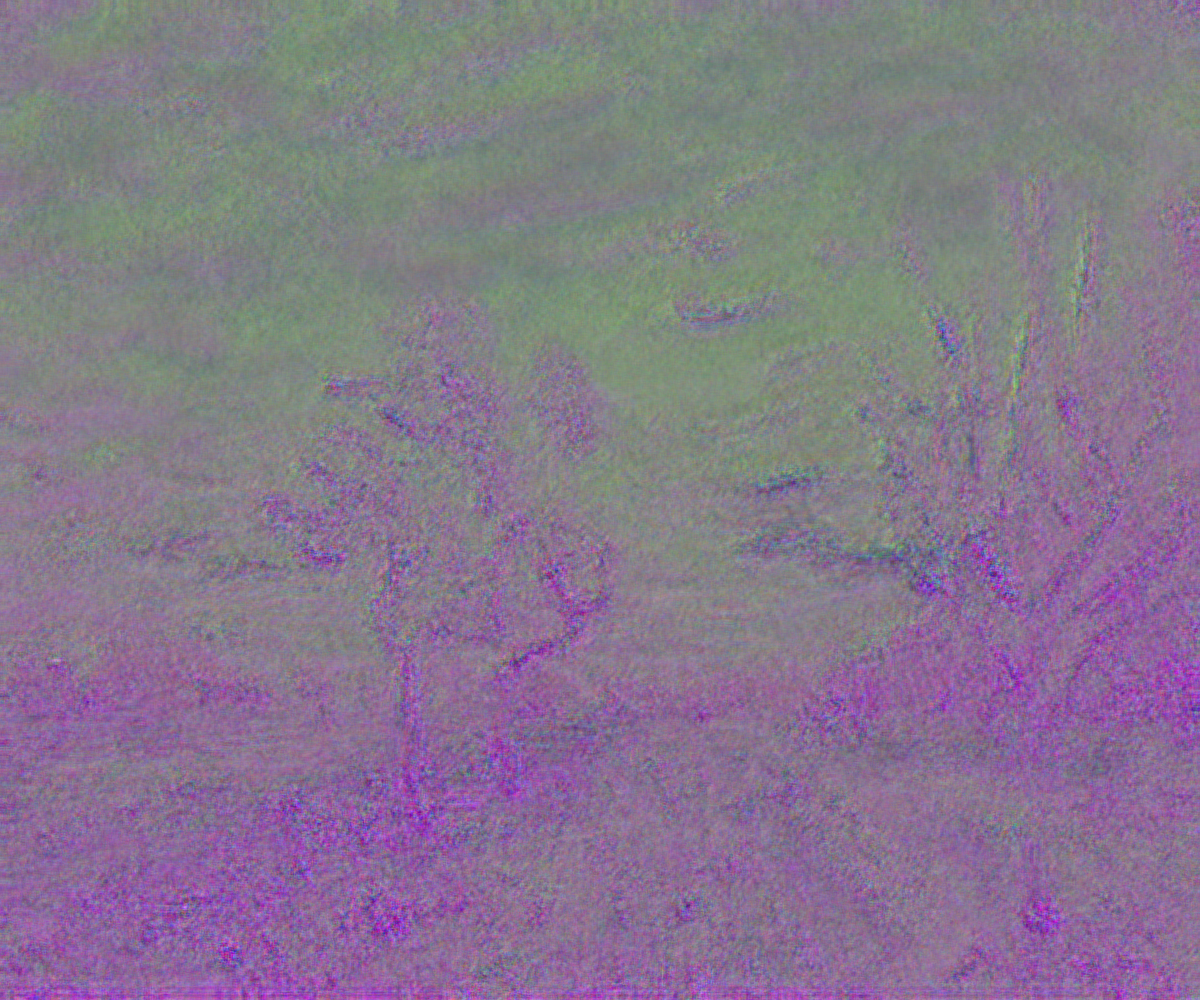

In [55]:
learn = load_learner('/content/drive/MyDrive/Colab_Notebooks/TrainedModels/uncorrupted.pkl', cpu=False) #WORKING DONT TOUCH
dset = Datasets(f'/content/drive/MyDrive/Colab_Notebooks/BestArtworksAndArtists/resized/{art}_{number}.jpg', tfms=[PILImage.create]) # WORKING DON'T TOUCH
dl = dset.dataloaders(after_item=[ToTensor()], after_batch=[IntToFloatTensor(), Normalize.from_stats(*imagenet_stats)], bs=1) # WORKING DON'T TOUCH
t_im = dl.one_batch()[0] # WORKING DON'T TOUCH
with torch.no_grad(): # WORKING DON'T TOUCH
  res = learn.model(t_im) # WORKING DON'T TOUCH
# # Convert the tensor to a numpy array # WORKING DON'T TOUCH
img_np = res.squeeze().permute(1, 2, 0).cpu().numpy() # WORKING DON'T TOUCH

# # Scale the values to [0, 1] range # WORKING DON'T TOUCH
img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min()) # WORKING DON'T TOUCH

# # Convert the numpy array to a PIL Image object # WORKING DON'T TOUCH
img_pil = Image.fromarray((img_np * 255).astype('uint8')) # WORKING DON'T TOUCH

# # Display the image # WORKING DON'T TOUCH
img_pil.show() # WORKING DON'T TOUCH

In [49]:
dset = Datasets(f'/content/drive/MyDrive/Colab_Notebooks/BestArtworksAndArtists/resized/{art}_{number}.jpg', tfms=[PILImage.create]) # WORKING DON'T TOUCH
dl = dset.dataloaders(after_item=[ToTensor()], after_batch=[IntToFloatTensor(), Normalize.from_stats(*imagenet_stats)], bs=1) # WORKING DON'T TOUCH

In [50]:
t_im = dl.one_batch()[0] # WORKING DON'T TOUCH


In [51]:
with torch.no_grad(): # WORKING DON'T TOUCH
  res = learn.model(t_im) # WORKING DON'T TOUCH

RuntimeError: ignored

In [ ]:
# # Convert the tensor to a numpy array # WORKING DON'T TOUCH
img_np = res.squeeze().permute(1, 2, 0).cpu().numpy() # WORKING DON'T TOUCH

# # Scale the values to [0, 1] range # WORKING DON'T TOUCH
img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min()) # WORKING DON'T TOUCH

# # Convert the numpy array to a PIL Image object # WORKING DON'T TOUCH
img_pil = Image.fromarray((img_np * 255).astype('uint8')) # WORKING DON'T TOUCH

# # Display the image # WORKING DON'T TOUCH
img_pil.show() # WORKING DON'T TOUCH

In [ ]:
res

TensorImage([[[[-0.1255, -0.2582,  0.0812,  ...,  0.4764,  0.1672, -0.0856],
               [ 0.1800,  0.0675,  0.3146,  ...,  0.5455,  0.3319,  0.0439],
               [-0.0659, -0.0276,  0.3228,  ...,  0.3913,  0.1418, -0.1541],
               ...,
               [ 0.2722,  0.5337,  0.5283,  ..., -0.0920,  0.2748,  0.0387],
               [ 0.7369,  0.4923,  0.3142,  ...,  0.1072,  0.4855,  0.3112],
               [ 0.5812,  0.6384,  0.4489,  ...,  0.1799,  0.5564,  0.4509]],

              [[-0.6682, -0.4486, -0.6009,  ..., -1.0578, -1.0871, -1.1358],
               [-0.5345, -0.3903, -0.6435,  ..., -0.9936, -0.8157, -0.8278],
               [-0.5974, -0.3864, -0.6179,  ..., -1.3365, -1.2239, -1.1973],
               ...,
               [-1.3902, -1.3007, -1.3800,  ..., -0.0062,  0.5073,  0.3469],
               [-1.3021, -1.2813, -1.2660,  ..., -0.1240,  0.2278,  0.2017],
               [-1.3486, -1.3497, -1.0855,  ..., -0.2325,  0.2333,  0.1822]],

              [[ 0.1086,  0.2318

In [ ]:
# input_img = Image.open(f'/content/drive/MyDrive/Colab_Notebooks/BestArtworksAndArtists/resized/{art}_{number}.jpg') #MAYBE WORKING
# style_img = Image.open(f'/content/drive/MyDrive/Colab_Notebooks/BestArtworksAndArtists/resized/{art}_{number+1}.jpg')#MAYBE WORKING

In [ ]:
# img = Image.open(f'/content/drive/MyDrive/Colab_Notebooks/BestArtworksAndArtists/resized/{art}_{number+1}.jpg').convert('RGB')

# # Define the image transformation pipeline
# transform = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(256),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# # Apply the image transformation pipeline to the input image
# img_tensor = transform(img)

# # Load the trained TransformerNet model
# model = TransformerNet()
# model.load_state_dict(torch.load('/content/drive/MyDrive/Colab_Notebooks/TrainedModels/newexported.pkl', map_location=torch.device('cpu')))
# model.eval()

# # Stylize the input image using the trained TransformerNet model
# with torch.no_grad():
#     output_tensor = model(img_tensor.unsqueeze(0))
    
# # Convert the output tensor to a PIL image and save it
# output_img = transforms.ToPILImage()(output_tensor.squeeze(0))
# output_img.save('/content/drive/MyDrive/Colab_Notebooks/TrainedModels/stylized_output.jpg')

In [ ]:
from fastai.vision.all import *
from torchvision.transforms import ToPILImage

In [ ]:
# # Load the input image
# img = PILImage.create(f'/content/drive/MyDrive/Colab_Notebooks/BestArtworksAndArtists/resized/{art}_{number+1}.jpg')

# # Define the image transformation pipeline
# tfms = [Resize(256), 
#         RandomCrop(size=256), 
#         ToTensor(), 
#         Normalize.from_stats(*imagenet_stats)]

# # Apply the image transformation pipeline to the input image
# img_tensor = Pipeline(tfms)(img).cpu()

# # Load the trained TransformerNet model
# learn = load_learner('/content/drive/MyDrive/Colab_Notebooks/TrainedModels/newexported.pkl')
# model = learn.model
# model.eval()

# # Stylize the input image using the trained TransformerNet model
# with torch.no_grad():
#     output_tensor = model(img_tensor.unsqueeze(0))

# # Convert the output tensor to a PIL image and save it
# output_img = ToPILImage()(output_tensor.squeeze(0).cpu())
# output_img.save('/content/drive/MyDrive/Colab_Notebooks/TrainedModels/stylized_output.jpg')

In [ ]:
# # Convert images to tensors and normalize
# input_tensor = tensor(np.array(input_img))[None].float()/255.
# style_tensor = tensor(np.array(style_img))[None].float()/255.

# # Generate stylized output image
# with torch.no_grad():
#     stylized_tensor = learn.model(input_tensor.to('cuda'), style_tensor.to('cuda'))
# stylized_img = PIL.Image.fromarray((stylized_tensor[0]*255).numpy().astype('uint8'))

# # Save the stylized output image
# stylized_img.save('/content/drive/MyDrive/Colab_Notebooks/TrainedModels/stylized_output.jpg')

In [ ]:
# tfms = transforms.Compose([
#         transforms.Resize((256,256)),
#         transforms.ToTensor(),
#         transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
#     ])
# content_tensor = tfms(content_img).unsqueeze(0)
# style_tensor = tfms(style_img).unsqueeze(0)

In [ ]:
# learn.model

In [ ]:
# stylized_tensor = learn.model(content_tensor.to('cuda'), style_tensor.to('cuda'))
 # assuming you have a CUDA enabled GPU
# stylized_img = Image.fromarray((stylized_tensor.squeeze().cpu().detach().numpy()*255).astype(np.uint8).transpose(1,2,0))

In [ ]:
# stylized_img.show()

In [ ]:
datablocks_dict[art].show_batch()

KeyboardInterrupt: ignored

In [ ]:
#learn.lr_find()#WORKING DON'T TOUCH

In [ ]:
#learn.fit_one_cycle(1, 1e-4)#WORKING DON'T TOUCH

In [ ]:
# learn.predict

In [ ]:
# learn.show_results()

In [ ]:
learn.loss_func = CrossEntropyLossFlat()#WORKING DON'T TOUCH
# learn.loss_func = CrossEntropyLossFlat()
# learn.export('myModel')
# learn.export(f'/content/drive/MyDrive/Colab_Notebooks/TrainedModels/final') #original


In [ ]:
# learn.save('/content/drive/MyDrive/Colab_Notebooks/TrainedModels/final')

In [ ]:
# learn.model.to('cpu')#WORKING DON'T TOUCH
# learn.export('/content/drive/MyDrive/Colab_Notebooks/TrainedModels/newexported.pkl') #WORKING DON'T TOUCH

In [ ]:
#learn.model.to('cpu')#WORKING DON'T TOUCH
#learn.export('/content/drive/MyDrive/Colab_Notebooks/TrainedModels/uncorrupted.pkl') #WORKING DON'T TOUCH

In [ ]:
# # Works don't touch
# dblock = DataBlock(blocks=(ImageBlock, ImageBlock),
#                    get_items=get_image_files,
#                    splitter=RandomSplitter(0.1, seed=42),
#                    item_tfms=[Resize(224)],
#                    batch_tfms=[Normalize.from_stats(*imagenet_stats)])
# dls = dblock.dataloaders(Path('/content/drive/MyDrive/Colab_Notebooks/BestArtworksAndArtists/images/William_Turner'))
# dls.show_batch()

In [ ]:
# artists[0]

In [ ]:
# # Create a dictionary of the paths to the photos of
# image_paths_dict = {}
# for path, curdir, files_l in os.walk('/content/drive/MyDrive/Colab_Notebooks/BestArtworksAndArtists/resized'):
#   for artist in artists:
#     image_paths_dict[artist] = []
#     for file in files_l:
#       if file.startswith(artist):
#         image_paths_dict[artist].append(os.path.abspath(f'/content/drive/MyDrive/Colab_Notebooks/BestArtworksAndArtists/resized/{file}'))
# image_paths_dict

In [ ]:
# def load_image(image):
#     #https://stackoverflow.com/questions/48755945/resize-images-with-a-batch
#   image = plt.imread(image)
#   img = tf.image.convert_image_dtype(image, tf.float32)
#   img = tf.image.resize(img, [400, 400])
#   # Shape -> (batch_size, h, w, d)
#   img = img[tf.newaxis, :]
#   return img

In [ ]:
# # images = tf.stack(images)
# tensor_loaded_imgs = {}
# for key in image_paths_dict:
#     tmp_arr = []
#     for img in image_paths_dict[key]:
#         tmp_arr.append(tf.io.read_file(img))
#         # tmp_arr.append(load_image(img))
#     tensor_loaded_imgs[key] = tmp_arr
# # image_paths_dict
# tensor_loaded_imgs

In [ ]:
# tensor_loaded_imgs[' ']